### This Notebook Will Walk Through Machine Learning Lesson 1 

### Import Packages

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

### Import Data

In [2]:
Real_estate = pd.read_csv('../Data/realestate.csv')

In [3]:
Real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Goal

With the above data, the goal is to accurately predict housing prices. This variable is conveniently labeled Y house price of unit area. You will use X variables numbered 2-6 to determine housing prices. When completed, if desired, you should be able to take completely new data, maybe from a new geographic location, and predict housing prices there (page 3 of lesson).



### Data Wrangling

First subset the data into x and y variables. Create x and y variables as arrays. y will represent the prediction variable, and x is the variables we will use to predict y.

In [4]:
x = Real_estate[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

In [5]:
y = Real_estate['Y house price of unit area']


### Train Test Split


One of the key things that separates machine learning from statistics is that machine learning utilizes the concept of "train test split." In statistics, you typically run your analysis on all the data you have available. In machine learning, you split your data in half, and reserve the first chunk for training the model, and the second half for testing the model. How big should a "chunk" be? Typically you want more data to be used for training than for testing. 80/20, 70/30, and 60/40 splits are all acceptable.

You will utilize the train_test_split() function from sklearn to split your data. You will end up with four data sets at the end:

x_train
x_test
y_train
y_test
There will be one training dataset and one testing dataset each for x and y.

As arguments into the train_test_split() function, you will place your x and y data, and specify how much of your data you want to test with the argument test_size=. In this case, the value of test_size= is .4, because you are going to use a 60/40 train/test split. This means that you are reserving 40% of your data for testing, and training with the remaining 60%.
(PAGE 3)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)
#the random_state is used so that the same answer will be received when running this, pulls the same random state.

### Look at the Shape of the Data:

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(248, 5) (248,)
(166, 5) (166,)


This is showing that in the x_train dataset, there are 248 rows and 5 columns, and in the x_test dataset, there are 166 rows and 5 columns. So you can see how the training and testing data is broken up.



### Create the Linear Regression Model

Now we will run the linear regression model on the training data. We will call our model lm. Then fit this model to the training data using the .fit() function, specifying the x and y training sets.

In [8]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

Want to note here, just like the LMS states, the data must be numeric, this can't be done as is with string data. It would need to be recoded or dropped before running the linear regression.

### Interpreting Supervised Machine Learning Model Accuracy

Let's review the model and see how well it fits the data!

### Examine Predictions

In [9]:
predictions = lm.predict(x_test)
predictions

array([14.77852916,  8.35848599, 23.1113017 , 47.67384657, 30.05251015,
       37.468435  , 38.01762284, 41.08294225, 46.50080685, 40.34536509,
       43.87818623, 33.77279613, 40.08116941, 37.31066596, 46.15211908,
       48.22093568, 39.48594154, 46.43844951, 49.94962395, 47.552992  ,
       41.60580876, 52.60152777, 47.16226231, 37.48194878, 32.40811002,
       50.67597957, 39.35917038, 47.99287312, 45.4694465 , 39.33112551,
       49.61736207, 42.53188577, 42.96261018, 46.15577268, 44.94124757,
        7.13730951, 39.15074038, 39.77497805,  7.07979164, 54.43242047,
       31.26660065, 46.90435905, 24.89017208, 48.80711134, 42.6710441 ,
       50.08982154, 41.0044385 , 37.39701978, 44.86394799, 36.76558821,
       46.8133099 , 35.89912014, 42.35933217, 14.7421879 , 38.74428879,
       47.50157796, 43.06612319, 45.44985241, 43.77496083, 39.48259244,
       34.31225036, 45.52392252, 42.44560897, 42.0625614 , 51.89857656,
       42.74806676, 24.28752167, 48.68058491, 31.25018334, 40.06

This is hard to read by itself, look at a scatterplot with the plt.scatter() function, graphing the y_test data against the predictions from our training model:

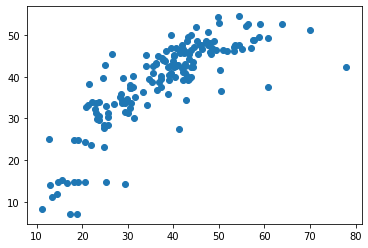

In [10]:
plt.scatter(y_test, predictions)

### Print an Accuracy Score

Print an accuracy score for this model. Place the .score() function inside the print() function with an argument of our testing data to get it:

In [11]:
print("Score:", lm.score(x_test, y_test))

Score: 0.6442380845121868


This means the model is 64.4% accurate.

### Examining Error

The next way to determine model fit is to look at the error terms. This is just another way to quantify the residuals - how close is the predicted data from the real data? There are many different mathematical ways to examine error, but we will look at mean absolute error (MAE), mean squared error (MSE) and root mean squared error (RMSE). There are no cut-off values when interpreting error scores, because each model with different variables and different units for those variables will generate radically different error values. The main thing to know about interpreting error is that the smaller the error value, the better, and they range from zero to infinity. You want as close to zero as you can get (page 4 LMS).



### Mean Absolute Error (MAE)

The average amount of error between the prediction and the real data. To calculate this use the metrics package from sklearn and the mean_absolute_error() function:

In [12]:
metrics.mean_absolute_error(y_test, predictions)

5.550201321415231

The lowest value is 0 so 5.55 is pretty good!

### Mean Squared Error (MSE)

MSE takes into account large amounts of error, and we will use the mean_squared_error() function from the sklearn metrics package:

In [13]:
metrics.mean_squared_error(y_test, predictions)

54.37572854491987

Since it is squared it is much larger than the MAE.

### Root Mean Squared Error (RMSE)

This is the square root of the mean squared error from above. Use the numpy sqrt() function to get the square root of the mean_squared_error() function

In [14]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

7.373990001682934

Shows model fits data pretty well as 7 is quite close to zero.

Here is a resource the LMS references to explain differences of calculating error!
https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

Check out the LMS on page 5 to read about effects of "bad" data such as overfitting, underfitting, and irrelevant variables.

### k-Fold Cross Validation in Python

Please read page 6 in your LMS to understand what we will do here!

### Import Packages

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Goal


The goal here is to accurately predict housing prices. To ensure this is the most accurate and rigorous model, we will be cross-validating it using the k-folds method.

### Create the Folds

You will use the KFold() function to create your different training and test sets. 

Below the code is slightly adjusted from the lesson:

In [16]:
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [  0   1   2   3   7   8   9  10  14  15  16  19  20  21  22  24  25  26
  28  30  31  32  33  34  35  36  37  38  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  60  63  64  66  68  70  71  72  74  75
  76  77  79  83  84  86  87  88  94  96  97  99 100 103 104 105 108 109
 110 111 112 113 114 115 116 118 121 123 124 126 128 129 130 131 133 134
 135 136 137 138 140 141 142 143 144 145 147 148 149 150 151 152 153 154
 155 156 157 158 160 163 166 167 168 169 170 174 175 176 177 178 181 182
 183 184 188 190 193 194 195 196 197 198 199 200 201 202 203 205 206 208
 209 210 212 215 216 217 219 220 221 222 224 225 226 227 229 231 234 235
 236 237 239 240 241 243 246 248 249 250 251 252 253 254 255 258 259 260
 262 263 264 265 266 267 269 275 276 277 278 279 280 281 282 283 284 285
 287 288 290 293 296 297 301 302 303 305 306 307 308 309 310 313 315 316
 317 318 319 321 324 326 327 328 331 333 334 335 336 339 340 342 343 344
 345 347 349 352 353 354 355 356 357 358 359

Below shows how to run cross validation in sklearn with one line of code:

In [17]:
print(cross_val_score(lm, x,y, cv=3))

[0.62051774 0.50393467 0.55970703]


The results show the first model was 62% accurate, the second model 50% accurate, and the third model was 56% accurate.

In [18]:
###Hope you enjoyed this walk through of Lesson 1 in Machine Learning:) <3 Mia